In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gdp
from DepthandTaxes.tools import results
from DepthandTaxes.tools import census

In [4]:
census2000 = census.CensusLoad('st-est00int-alldata',kind='group').pretty()
census2010 = census.CensusLoad('sc-est2017-alldata6').projection()
df = pd.concat([census2000, census2010],sort=True)
df.columns = df.columns.str.upper()
df.drop_duplicates(inplace=True)

In [5]:
df = df.merge(results.GlobalVariables().df, how='left', left_on='YEAR', right_on='YEAR')
df.drop(columns=0,inplace=True)

In [6]:
presge2000 = results.FECLoad('presge',2000).pretty()
presprim2000 = results.FECLoad('presprim',2000,is_primary=True).pretty()
pres2000 = presge2000.merge(presprim2000, how='outer', left_on= ['YEAR', 'STATE', 'STATEABBREVIATION', 'DISTRICT', 'CANDIDATENAME', 'PARTY'], 
		right_on=['YEAR', 'STATE', 'STATEABBREVIATION', 'DISTRICT', 'CANDIDATENAME', 'PARTY'])
sen2000 = results.FECLoad('senate',2000,is_pres=False).pretty()
house2000 = results.FECLoad('house',2000,is_pres=False,is_house=True).pretty()
results2000 = pd.concat([pres2000, sen2000, house2000], sort=True)
results2002 = results.FECLoad('2002fedresults',2002).pretty()
results2004 = results.FECLoad('federalelections2004',2004).pretty()
results2006 = results.FECLoad('federalelections2006',2006).pretty()
results2008 = results.FECLoad('federalelections2008',2008).pretty()
results2010 = results.FECLoad('federalelections2010',2010).pretty()
results2012 = results.FECLoad('federalelections2012',2012).pretty()
results2014 = results.FECLoad('federalelections2014',2014).pretty()
results2016 = results.FECLoad('federalelections2016',2016).pretty()
resultsall = pd.concat([results2000,results2002,results2004,results2006,results2008,results2010,results2012,results2014,results2016],sort=True)
resultsall = results.ElectionAnalytics(resultsall).pretty()

C:\Users\ptopp\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\ptopp\Anaconda3\lib\site-packages\pandas\core\generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\ptopp\Anaconda3\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).r

In [7]:
df = df.merge(resultsall, how='left', left_on=['YEAR','STATE','PARTY','DISTRICT'], right_on=['YEAR','STATE','PARTY','DISTRICT'])

In [6]:
sns.set_style('darkgrid')
sns.set_palette('seismic',7)
political_pal = {'Democratic' : 'C0', 'Republican': 'C6', 'Other': 'g'}

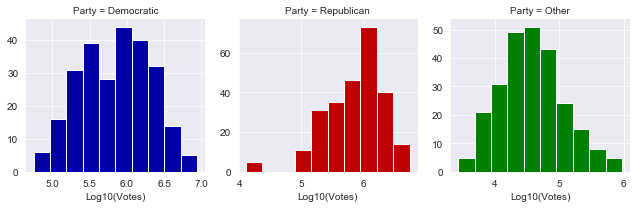

In [7]:
data = results.AllData(df).response()
g = sns.FacetGrid(data=data, col='Party', col_wrap=3, sharex=False, sharey=False, hue='Party', palette=political_pal)
g = g.map(plt.hist, 'Log10(Votes)')
# g.savefig('pres_uni_response.png')

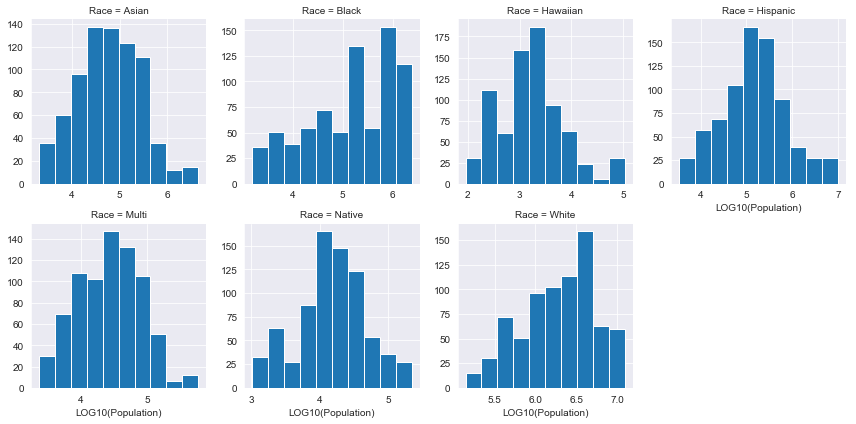

In [10]:
sns.set_palette('tab10')
data = results.AllData(df).cont_var()
g = sns.FacetGrid(data=data, col='Race', col_wrap=4, sharex=False, sharey=False)
g = g.map(plt.hist, 'LOG10(Population)')
g.savefig('pres_uni_continuous.png')

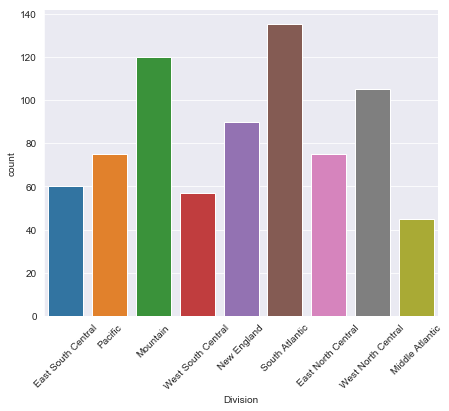

In [11]:
data = results.AllData(df).cat_var()
g = sns.catplot(data=data, x='Division', kind='count', aspect=1.25)
g.set_xticklabels(rotation=45)
g.savefig('pres_uni_categorical.png')

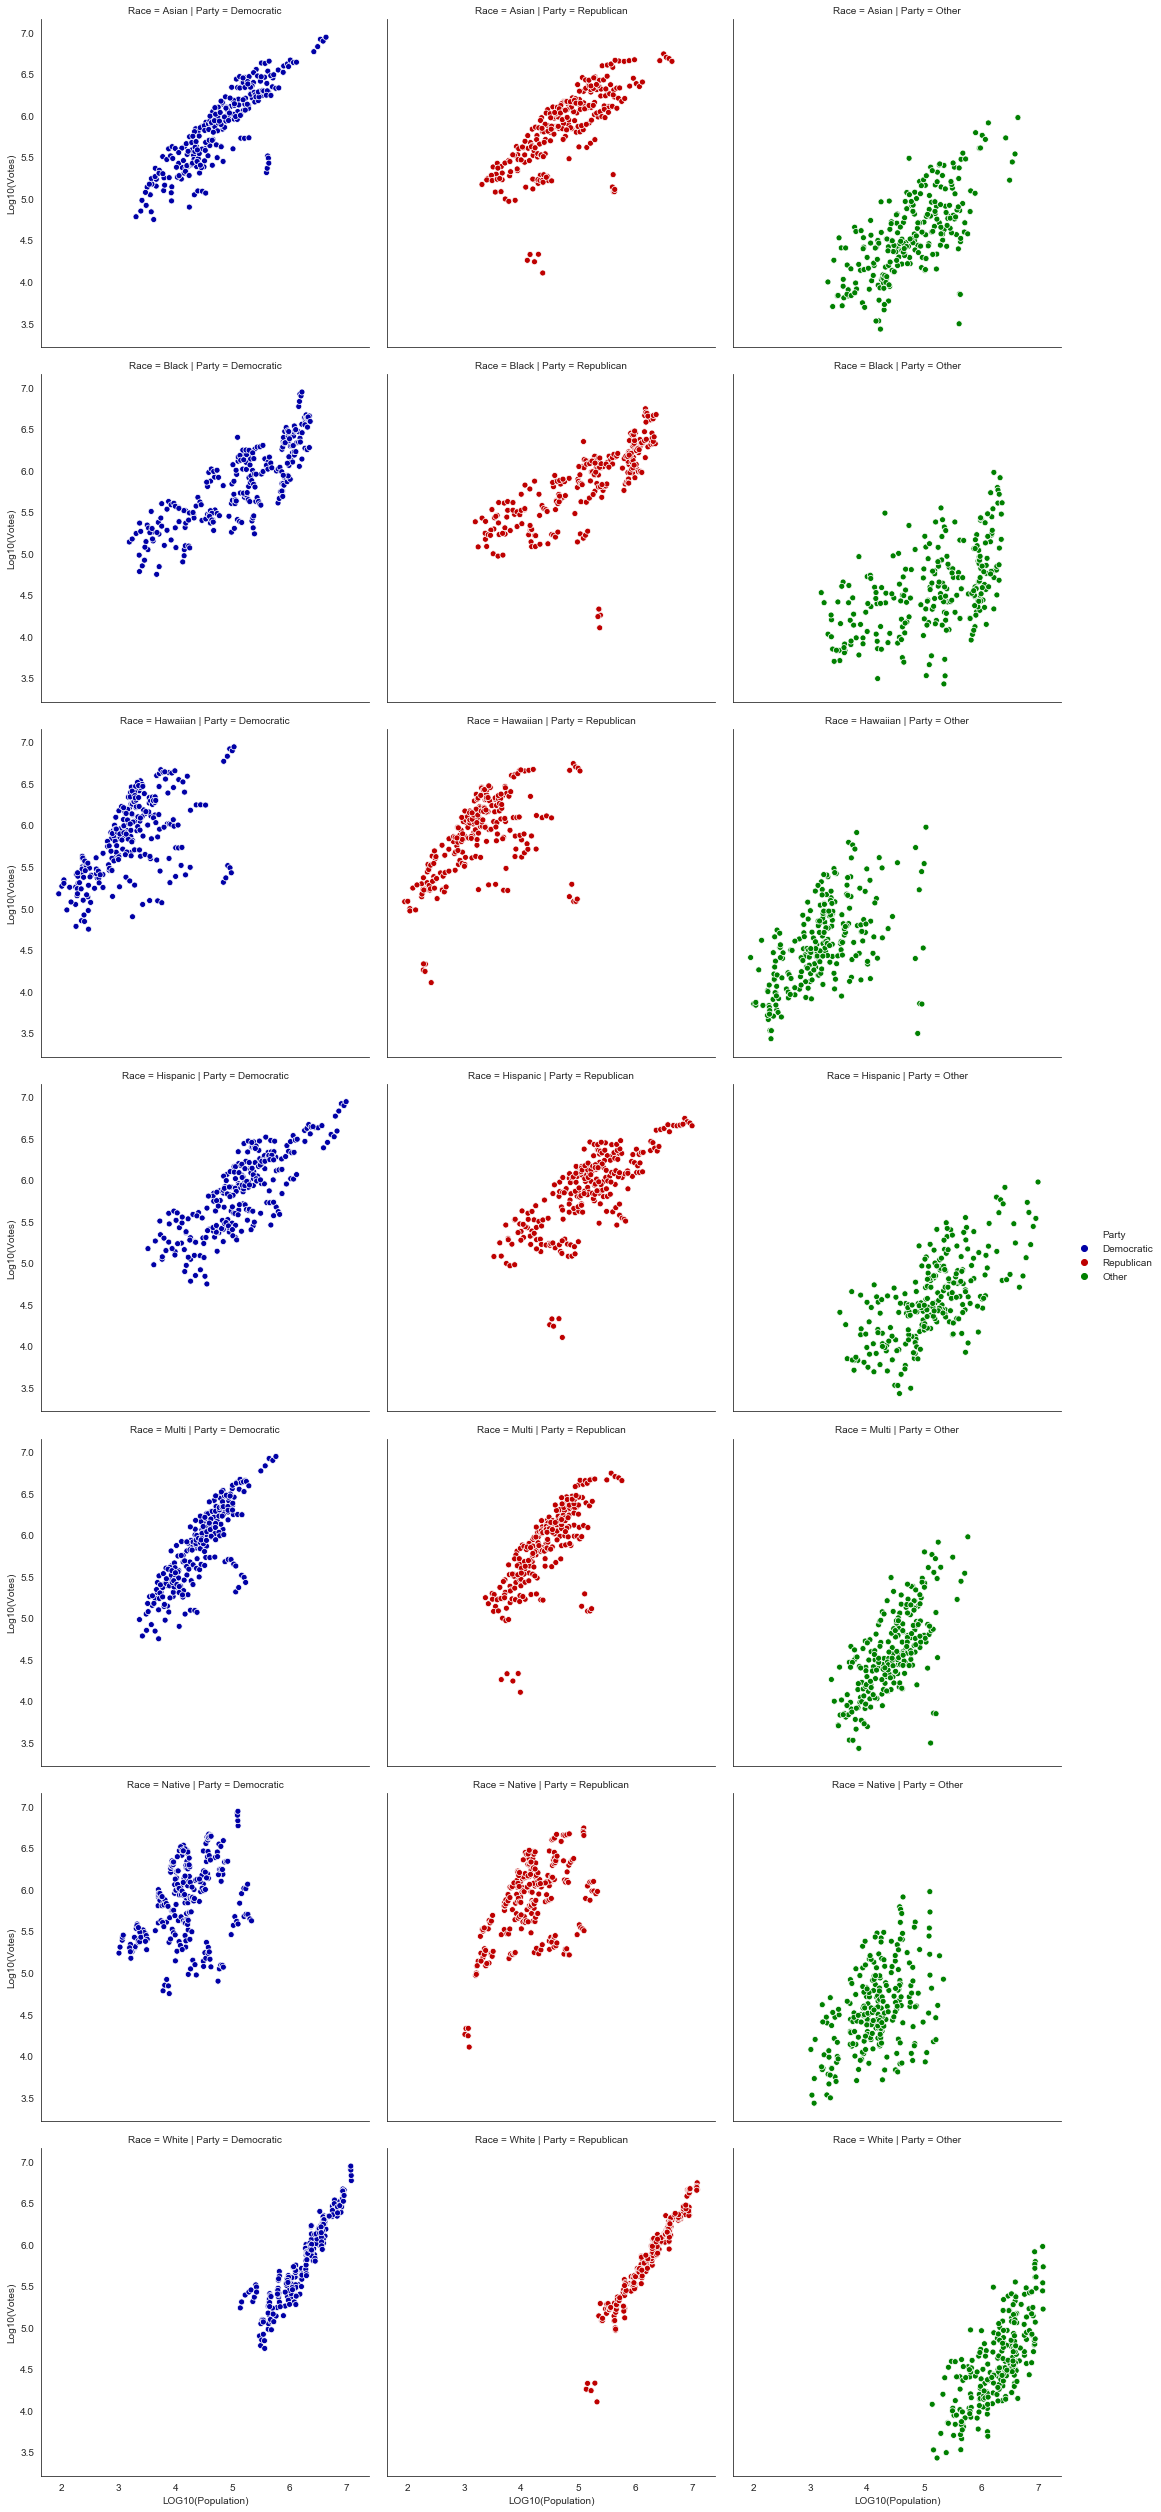

In [261]:
sns.set_palette('seismic',7)
data = results.AllData(df).cont_var()
g = sns.relplot(data=data, col='Party', row='Race', hue='Party', palette=political_pal, x='LOG10(Population)', y='Log10(Votes)')
g.savefig('pres_bi_continuous.png')

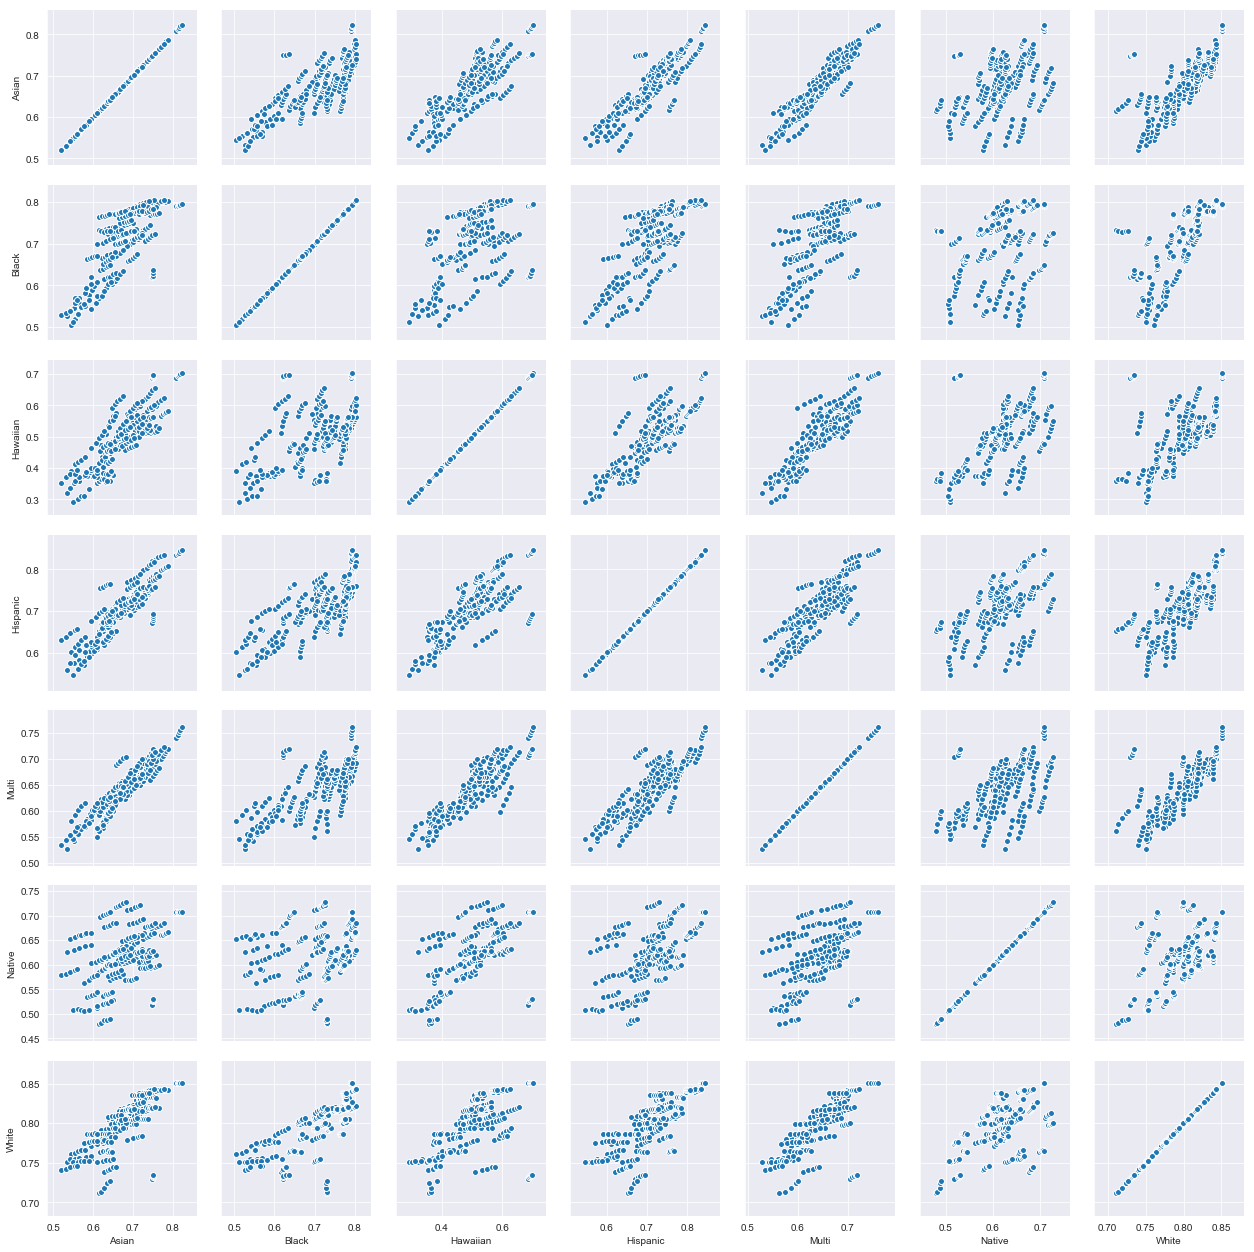

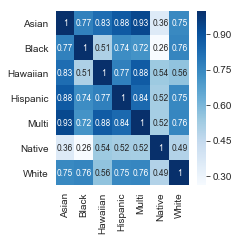

In [20]:
sns.set_palette('tab10')
data = results.AllData(df).train
data = data[['ASIAN', 'BLACK', 'HAWAIIAN', 'HISPANIC', 'MULTI', 'NATIVE', 'WHITE']]
data.drop_duplicates(inplace=True)
data = data.apply(np.log10)
data.columns = data.columns.str.title()
g = sns.PairGrid(data)
g = g.map(plt.scatter, edgecolor="w")
g.savefig('pres_corrmatrix.png')
g2 = sns.FacetGrid(data)
g2.axes = sns.heatmap(data.corr(), annot=True, annot_kws = {'fontsize': 'small'}, cmap='Blues')	
g2.savefig('pres_correlations.png')

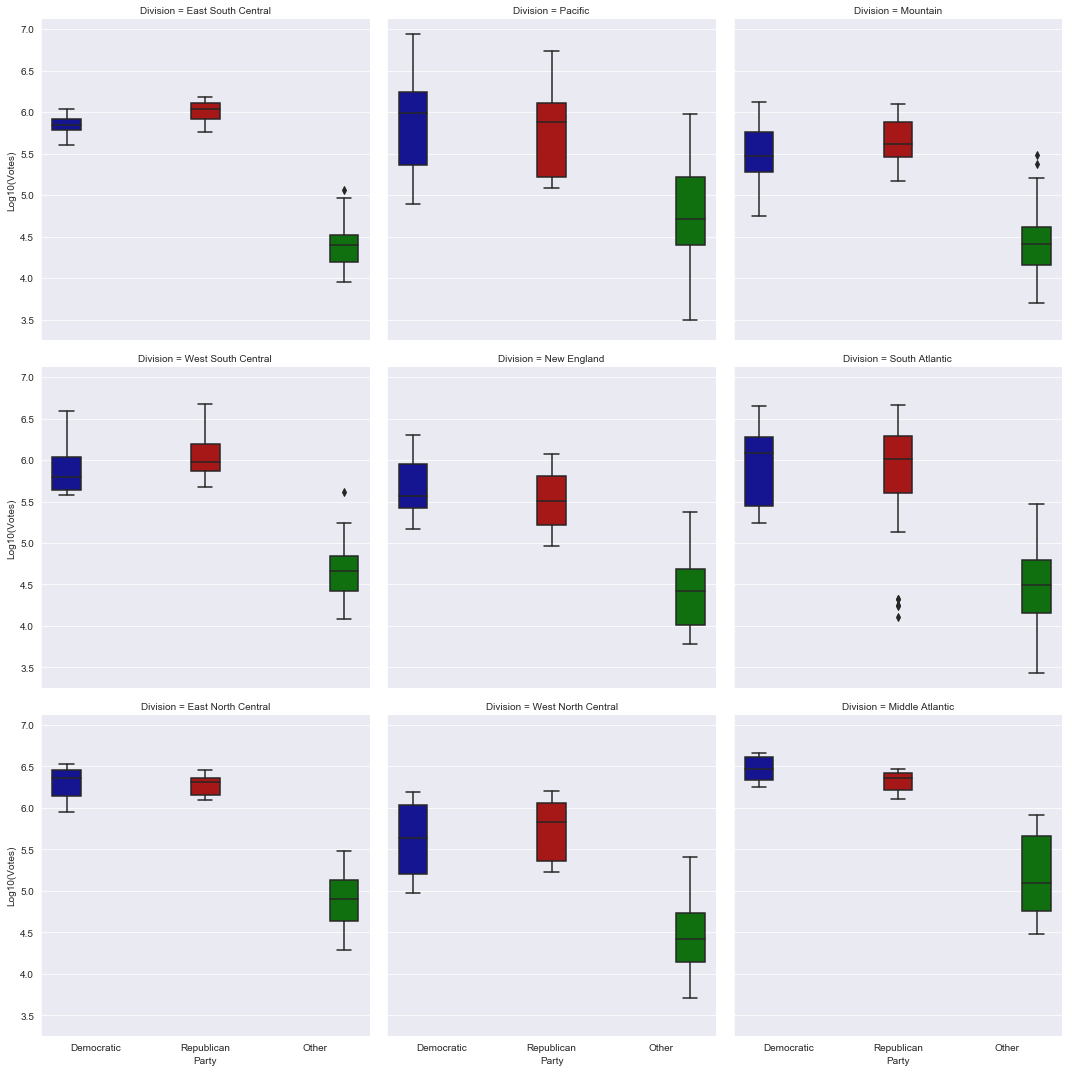

In [21]:
sns.set_palette('seismic',7)
data = results.AllData(df).cat_var()
g = sns.catplot(data=data, x='Party', y='Log10(Votes)', hue='Party', col='Division', kind='box', col_wrap=3, palette=political_pal)
g.savefig('pres_bi_categorical.png')

In [19]:
data = results.AllData(df).regression(output='fit')
# data = data.style
data.to_html()

C:\Users\ptopp\documents\depthandtaxes\DepthandTaxes\tools\results.py:686: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  dem['PRELog10(Votes)'] = demreg.predict(demX)
C:\Users\ptopp\documents\depthandtaxes\DepthandTaxes\tools\results.py:687: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  rep['PRELog10(Votes)'] = repreg.predict(repX)
C:\Users\ptopp\documents\depthandtaxes\DepthandTaxes\tools\results.py:688: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>RSquare</th>\n      <th>RMSE</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>Democrat</th>\n      <td>0.953364</td>\n      <td>0.101878</td>\n    </tr>\n    <tr>\n      <th>Republican</th>\n      <td>0.958308</td>\n      <td>0.097083</td>\n    </tr>\n    <tr>\n      <th>Other</th>\n      <td>0.635322</td>\n      <td>0.301242</td>\n    </tr>\n  </tbody>\n</table>'

C:\Users\ptopp\documents\depthandtaxes\DepthandTaxes\elections\results.py:686: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  dem['PRELog10(Votes)'] = demreg.predict(demX)
C:\Users\ptopp\documents\depthandtaxes\DepthandTaxes\elections\results.py:687: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  rep['PRELog10(Votes)'] = repreg.predict(repX)
C:\Users\ptopp\documents\depthandtaxes\DepthandTaxes\elections\results.py:688: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

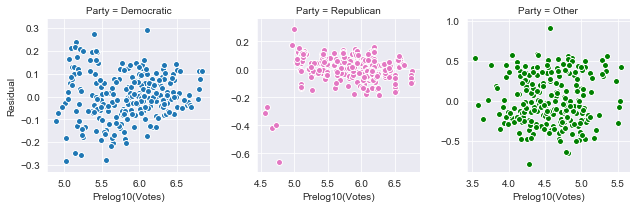

In [57]:
data = results.AllData(df).residuals()
g = sns.FacetGrid(data, col='Party', hue='Party', palette=political_pal, sharex=False, sharey=False)
g = g.map(plt.scatter, 'Prelog10(Votes)', 'Residual', edgecolor='w')
g.savefig('pres_residuals.png')


C:\Users\ptopp\Documents\DepthandTaxes\DepthandTaxes\tools\results.py:689: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  dem['PRELog10(Votes)'] = demreg.predict(demX)
C:\Users\ptopp\Documents\DepthandTaxes\DepthandTaxes\tools\results.py:690: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  rep['PRELog10(Votes)'] = repreg.predict(repX)
C:\Users\ptopp\Documents\DepthandTaxes\DepthandTaxes\tools\results.py:691: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

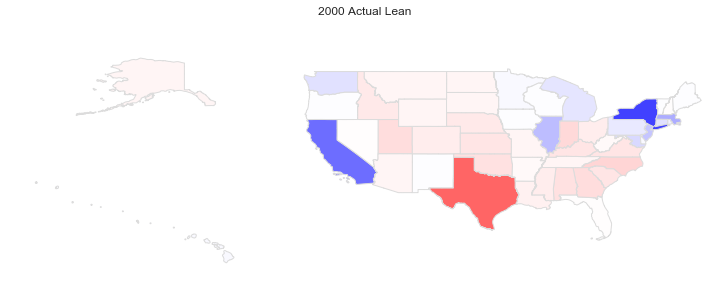

In [24]:
data = results.AllData(df)
data.mapping(2000)
# prespredict2000.savefig('prespredict2000.png')

In [16]:
importlib.reload(results)

<module 'DepthandTaxes.tools.results' from 'C:\\Users\\ptopp\\Documents\\DepthandTaxes\\DepthandTaxes\\tools\\results.py'>

C:\Users\ptopp\Documents\DepthandTaxes\DepthandTaxes\tools\results.py:689: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  dem['PRELog10(Votes)'] = demreg.predict(demX)
C:\Users\ptopp\Documents\DepthandTaxes\DepthandTaxes\tools\results.py:690: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  rep['PRELog10(Votes)'] = repreg.predict(repX)
C:\Users\ptopp\Documents\DepthandTaxes\DepthandTaxes\tools\results.py:691: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

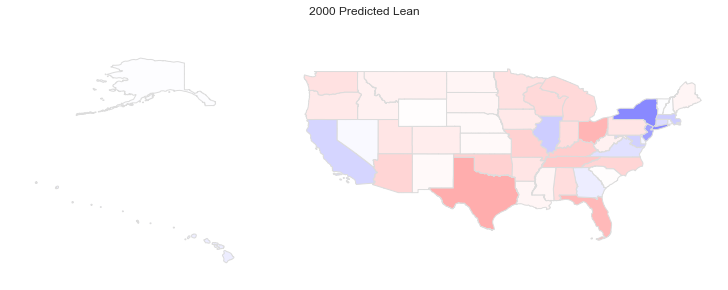

In [25]:
data.mapping(2000,'PREDICTED')

C:\Users\ptopp\Documents\DepthandTaxes\DepthandTaxes\tools\results.py:689: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  dem['PRELog10(Votes)'] = demreg.predict(demX)
C:\Users\ptopp\Documents\DepthandTaxes\DepthandTaxes\tools\results.py:690: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  rep['PRELog10(Votes)'] = repreg.predict(repX)
C:\Users\ptopp\Documents\DepthandTaxes\DepthandTaxes\tools\results.py:691: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

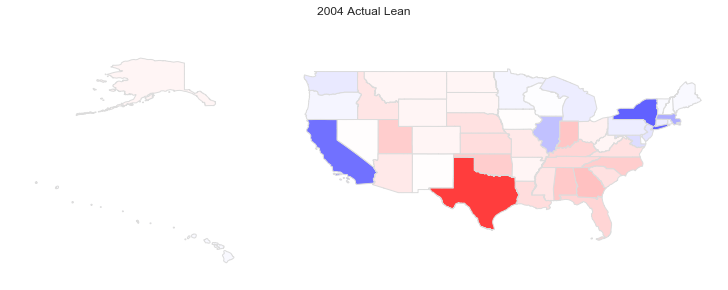

In [39]:
data.mapping(2004)

C:\Users\ptopp\Documents\DepthandTaxes\DepthandTaxes\tools\results.py:689: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  dem['PRELog10(Votes)'] = demreg.predict(demX)
C:\Users\ptopp\Documents\DepthandTaxes\DepthandTaxes\tools\results.py:690: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  rep['PRELog10(Votes)'] = repreg.predict(repX)
C:\Users\ptopp\Documents\DepthandTaxes\DepthandTaxes\tools\results.py:691: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

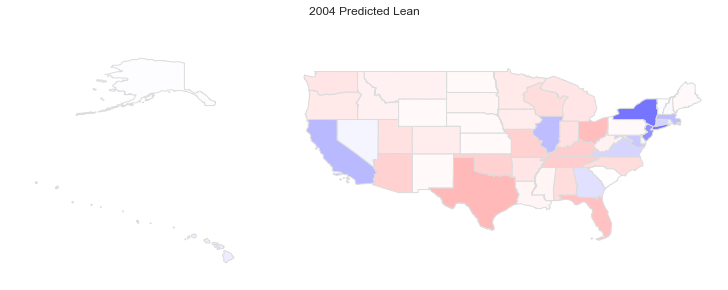

In [38]:
data.mapping(2004,'PREDICTED')

C:\Users\ptopp\Documents\DepthandTaxes\DepthandTaxes\tools\results.py:689: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  dem['PRELog10(Votes)'] = demreg.predict(demX)
C:\Users\ptopp\Documents\DepthandTaxes\DepthandTaxes\tools\results.py:690: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  rep['PRELog10(Votes)'] = repreg.predict(repX)
C:\Users\ptopp\Documents\DepthandTaxes\DepthandTaxes\tools\results.py:691: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

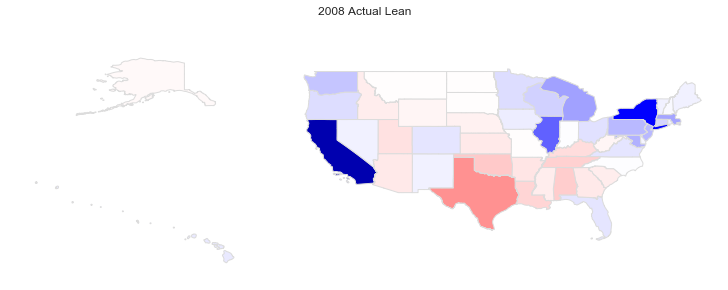

In [37]:
data.mapping(2008)

C:\Users\ptopp\Documents\DepthandTaxes\DepthandTaxes\tools\results.py:689: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  dem['PRELog10(Votes)'] = demreg.predict(demX)
C:\Users\ptopp\Documents\DepthandTaxes\DepthandTaxes\tools\results.py:690: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  rep['PRELog10(Votes)'] = repreg.predict(repX)
C:\Users\ptopp\Documents\DepthandTaxes\DepthandTaxes\tools\results.py:691: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

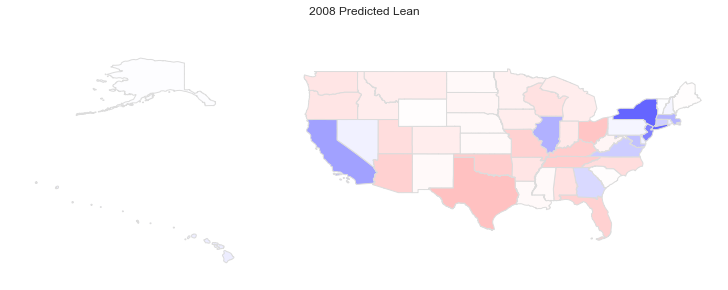

In [36]:
data.mapping(2008,'PREDICTED')

C:\Users\ptopp\Documents\DepthandTaxes\DepthandTaxes\tools\results.py:689: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  dem['PRELog10(Votes)'] = demreg.predict(demX)
C:\Users\ptopp\Documents\DepthandTaxes\DepthandTaxes\tools\results.py:690: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  rep['PRELog10(Votes)'] = repreg.predict(repX)
C:\Users\ptopp\Documents\DepthandTaxes\DepthandTaxes\tools\results.py:691: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

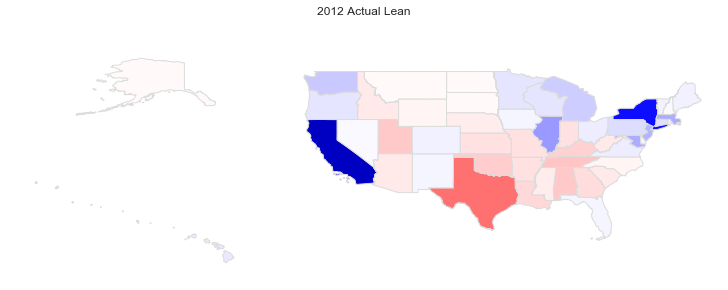

In [35]:
data.mapping(2012)

C:\Users\ptopp\Documents\DepthandTaxes\DepthandTaxes\tools\results.py:689: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  dem['PRELog10(Votes)'] = demreg.predict(demX)
C:\Users\ptopp\Documents\DepthandTaxes\DepthandTaxes\tools\results.py:690: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  rep['PRELog10(Votes)'] = repreg.predict(repX)
C:\Users\ptopp\Documents\DepthandTaxes\DepthandTaxes\tools\results.py:691: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

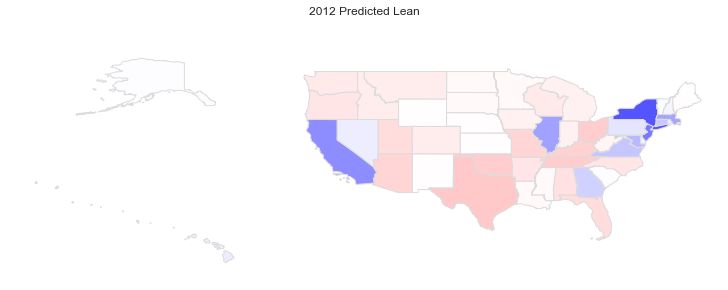

In [34]:
data.mapping(2012,'PREDICTED')

C:\Users\ptopp\Documents\DepthandTaxes\DepthandTaxes\tools\results.py:689: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  dem['PRELog10(Votes)'] = demreg.predict(demX)
C:\Users\ptopp\Documents\DepthandTaxes\DepthandTaxes\tools\results.py:690: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  rep['PRELog10(Votes)'] = repreg.predict(repX)
C:\Users\ptopp\Documents\DepthandTaxes\DepthandTaxes\tools\results.py:691: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

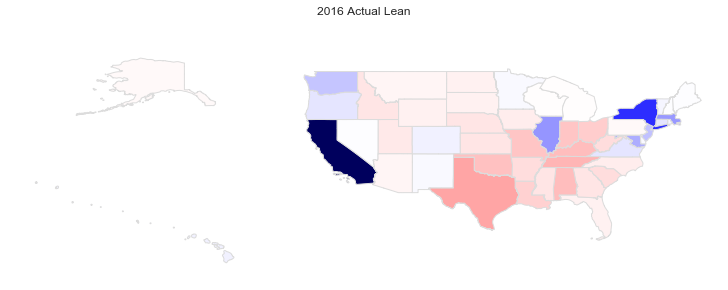

In [33]:
data.mapping(2016)

C:\Users\ptopp\Documents\DepthandTaxes\DepthandTaxes\tools\results.py:689: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  dem['PRELog10(Votes)'] = demreg.predict(demX)
C:\Users\ptopp\Documents\DepthandTaxes\DepthandTaxes\tools\results.py:690: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  rep['PRELog10(Votes)'] = repreg.predict(repX)
C:\Users\ptopp\Documents\DepthandTaxes\DepthandTaxes\tools\results.py:691: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

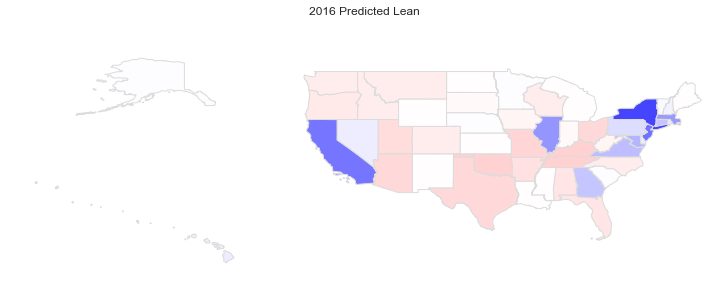

In [32]:
data.mapping(2016,'PREDICTED')

C:\Users\ptopp\Documents\DepthandTaxes\DepthandTaxes\tools\results.py:689: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  dem['PRELog10(Votes)'] = demreg.predict(demX)
C:\Users\ptopp\Documents\DepthandTaxes\DepthandTaxes\tools\results.py:690: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  rep['PRELog10(Votes)'] = repreg.predict(repX)
C:\Users\ptopp\Documents\DepthandTaxes\DepthandTaxes\tools\results.py:691: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

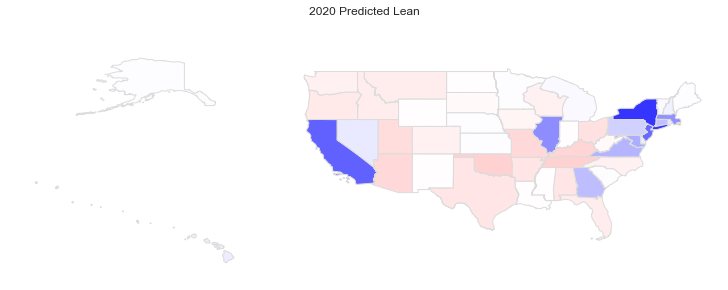

In [31]:
data.mapping(2020,'PREDICTED')

C:\Users\ptopp\Documents\DepthandTaxes\DepthandTaxes\tools\results.py:689: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  dem['PRELog10(Votes)'] = demreg.predict(demX)
C:\Users\ptopp\Documents\DepthandTaxes\DepthandTaxes\tools\results.py:690: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  rep['PRELog10(Votes)'] = repreg.predict(repX)
C:\Users\ptopp\Documents\DepthandTaxes\DepthandTaxes\tools\results.py:691: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

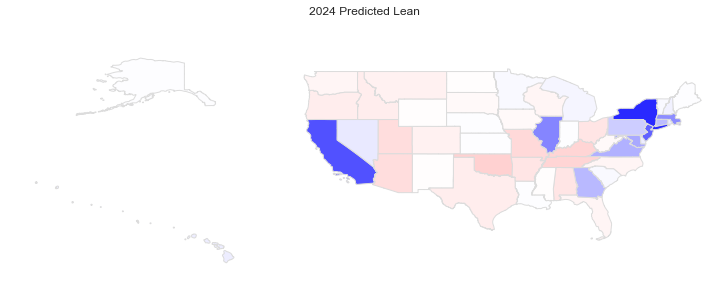

In [30]:
data.mapping(2024,'PREDICTED')

C:\Users\ptopp\Documents\DepthandTaxes\DepthandTaxes\tools\results.py:689: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  dem['PRELog10(Votes)'] = demreg.predict(demX)
C:\Users\ptopp\Documents\DepthandTaxes\DepthandTaxes\tools\results.py:690: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  rep['PRELog10(Votes)'] = repreg.predict(repX)
C:\Users\ptopp\Documents\DepthandTaxes\DepthandTaxes\tools\results.py:691: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

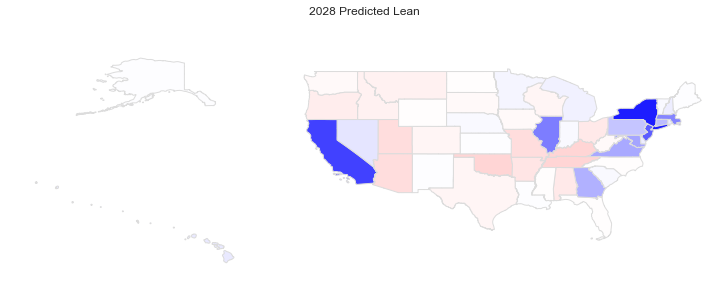

In [29]:
data.mapping(2028,'PREDICTED')

C:\Users\ptopp\Documents\DepthandTaxes\DepthandTaxes\tools\results.py:689: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  dem['PRELog10(Votes)'] = demreg.predict(demX)
C:\Users\ptopp\Documents\DepthandTaxes\DepthandTaxes\tools\results.py:690: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  rep['PRELog10(Votes)'] = repreg.predict(repX)
C:\Users\ptopp\Documents\DepthandTaxes\DepthandTaxes\tools\results.py:691: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

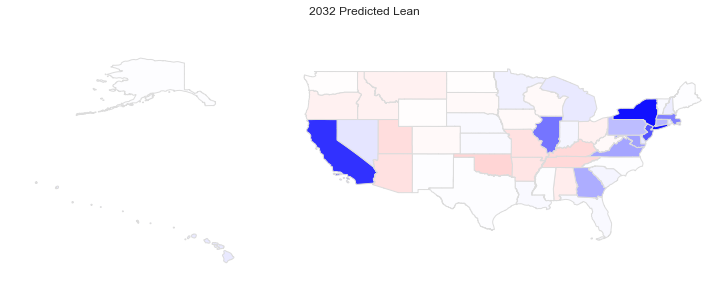

In [28]:
data.mapping(2032,'PREDICTED')

C:\Users\ptopp\Documents\DepthandTaxes\DepthandTaxes\tools\results.py:689: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  dem['PRELog10(Votes)'] = demreg.predict(demX)
C:\Users\ptopp\Documents\DepthandTaxes\DepthandTaxes\tools\results.py:690: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  rep['PRELog10(Votes)'] = repreg.predict(repX)
C:\Users\ptopp\Documents\DepthandTaxes\DepthandTaxes\tools\results.py:691: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

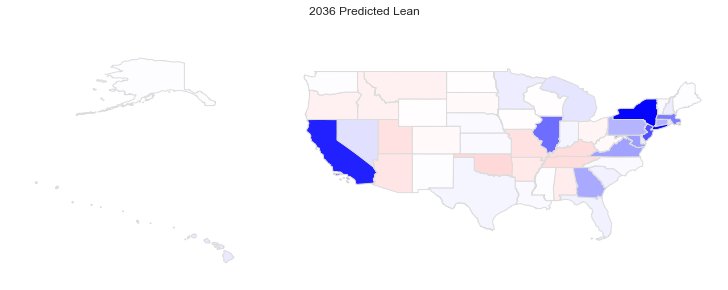

In [27]:
data.mapping(2036,'PREDICTED')

C:\Users\ptopp\Documents\DepthandTaxes\DepthandTaxes\tools\results.py:689: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  dem['PRELog10(Votes)'] = demreg.predict(demX)
C:\Users\ptopp\Documents\DepthandTaxes\DepthandTaxes\tools\results.py:690: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  rep['PRELog10(Votes)'] = repreg.predict(repX)
C:\Users\ptopp\Documents\DepthandTaxes\DepthandTaxes\tools\results.py:691: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

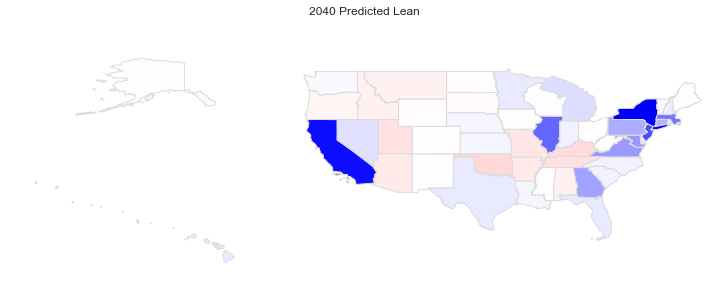

In [26]:
data.mapping(2040,'PREDICTED')